In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
voters= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')


#Introduction



This project aims to analyze new voter trends in the US, comparing data in 2016 pre poandemic and 2020.

The goal is to understand the impact COVID had on voter registration in areas of the country.

its important ot understand how/if a pandemic can effect new voter registration. using whats learned from this analysis can help mange in the future if a pandemic is to occurr again.


1. did Covid cause a lower voter turnout across the country?

2. what states had the biggest change in registerd voters from 2016 to 2020

#1. Data Proccesing

Our Dataset has 4 varible names Jurisdiction, Year,	Month, and New registered voters.

***Jurisdiciton*** being the state/city the data was collected from.

***Year*** being the year the data was collected.

***Month*** showing the month the data was collected.

***New registered voters*** showing the number of new voters.

In [4]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [5]:
#checking for missing data
voters.isnull().values.any()

False

In [6]:
#check data types of columns
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [7]:
#renaming Jurisdiction and new voters Column
voters=voters.rename(columns={'Jurisdiction':'NAME','New registered voters':'registered_voters'})


##Potential Limitations



*   No demographic information
*   only 13 out of 50 states available for data - cant get a full scope of the effets  
* lack of outside information - what else was happening in the world to lead to these numbers



In [8]:
#highest amount of new voters
voters.sort_values('registered_voters', ascending=False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


In [9]:
#average new voter count
avg_voters = voters['registered_voters'].mean()
avg_voters

48223.46226415094

In [10]:
#making a dataframe of times where new voter reg is higher than avg
high_voters =  voters.loc[voters['registered_voters']>avg_voters]

In [11]:
#find hom many rows there are in new dataframe
len(high_voters)

36

In [12]:
#finds the amount of times each state goes above avg
high_voters['NAME'].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


In [13]:
#shows the top 3 states with the highest new voter average
avg_state_high_voters=high_voters.groupby('NAME')['registered_voters'].mean()
avg_state_high_voters.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,159627.571429
Texas,134466.125000
Illinois,74252.250000


#Data Visualization

In [14]:
voters_sum=voters.groupby('NAME')['registered_voters'].sum().reset_index()
voters_sum.head()

,NAME,registered_voters
0,Arizona,282492
1,California,1156363
2,Colorado,164220
3,Delaware,25331
4,District of Columbia,32484



*   California and Texas have the highest combined voter registration.
*  larger states have far more registered voters, while smaller states or districts have fewer.



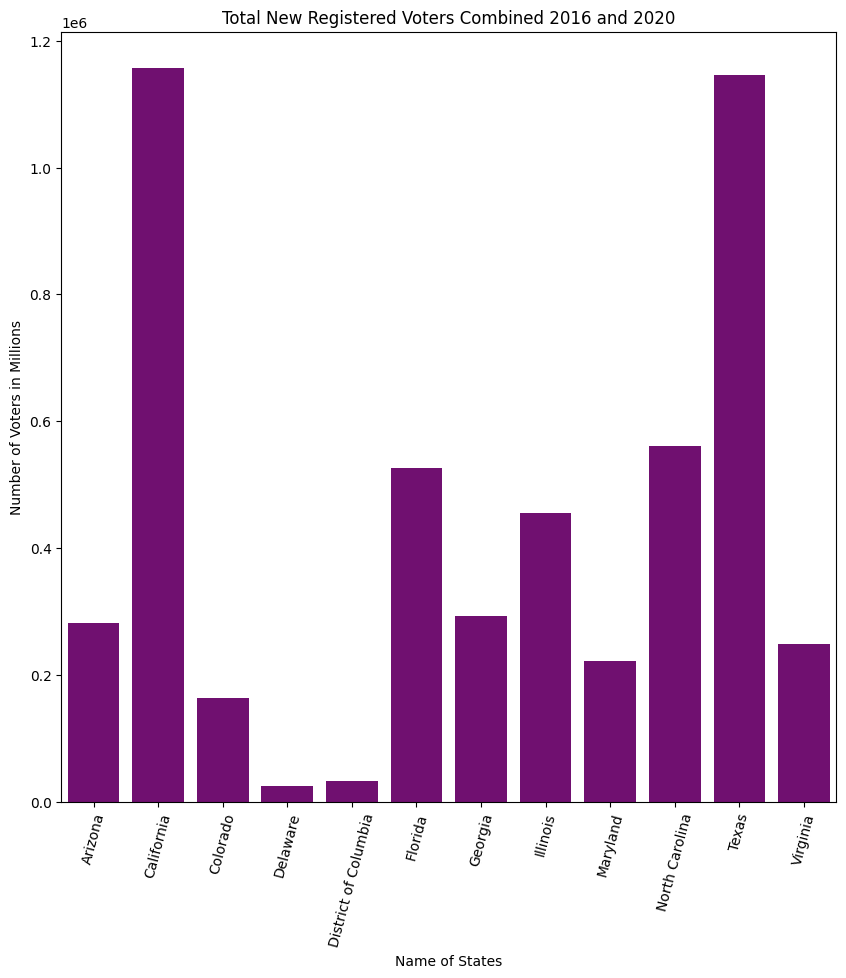

In [15]:
#creating a graph to show total new registered voters by state
plt.figure(figsize=(10, 10))
sns.barplot(voters_sum, x="NAME",y='registered_voters', color='purple')
plt.xticks(rotation=75)
plt.xlabel('Name of States')
plt.ylabel('Number of Voters in Millions')
plt.title('Total New Registered Voters Combined 2016 and 2020')
plt.show()

In [16]:
#making a new dataframe of montly totals each year
monthly_totals = voters.groupby(['Year', 'Month'],sort=False)['registered_voters'].sum().reset_index()
monthly_totals


,Year,Month,registered_voters
0,2016,Jan,473205
1,2016,Feb,704008
2,2016,Mar,742455
3,2016,Apr,675614
4,2020,Jan,666191
5,2020,Feb,797257
6,2020,Mar,601074
7,2020,Apr,200676
8,2016,May,158360
9,2020,May,92847




*   In 2020 regsitration starts higher in Jan and peaks in Feb beating 2016 at those point

*   2016 and 2020 voter registration raises first 2 months
*   March we see 2020 number crashing
*   2016 slight rise in march
*   by May both 2016 2020 hit a low







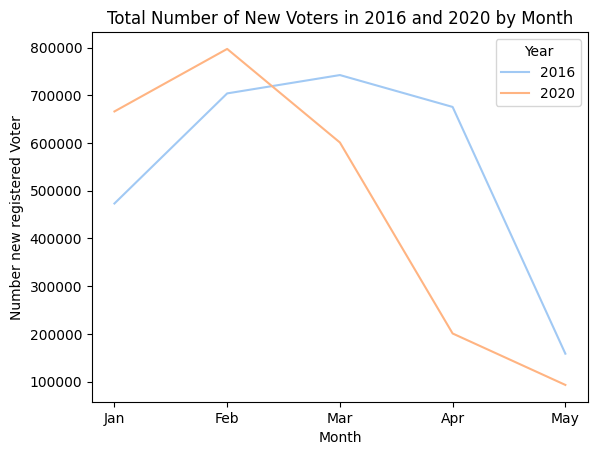

In [17]:
#creating a line graph of the new voter by month
sns.lineplot(monthly_totals, x = 'Month', y= 'registered_voters',hue="Year", palette='pastel')
plt.ylabel('Number new registered Voter')
plt.title('Total Number of New Voters in 2016 and 2020 by Month')
plt.show()

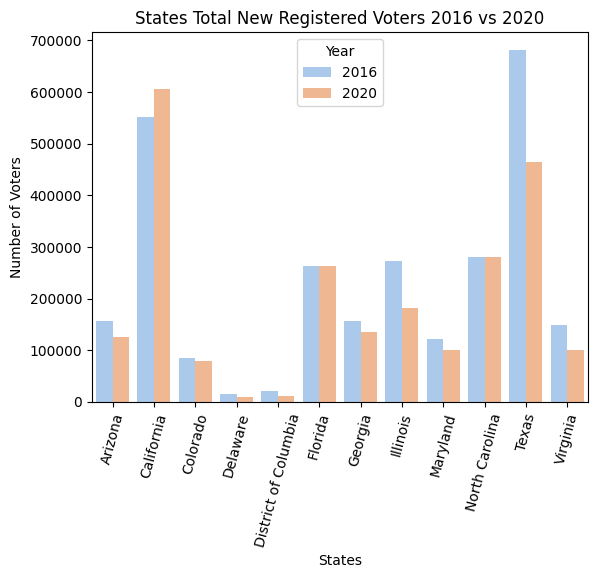

In [18]:
#making a graph to compare total New voter registration per year
colors=['green','yellow']
state_difference=voters.groupby(['NAME', 'Year'])['registered_voters'].sum().reset_index()
sns.barplot(state_difference, x='NAME', y='registered_voters',hue='Year', palette='pastel')
plt.xticks(rotation=75)
plt.xlabel('States')
plt.ylabel('Number of Voters')
plt.title('States Total New Registered Voters 2016 vs 2020')
plt.show()

#Mapping

In [19]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.41 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [20]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [21]:
#making the boundary box
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

In [22]:
#creating a new that shows the average voter registration per state
avg_state_voters=voters.groupby('NAME')['registered_voters'].mean().reset_index()
avg_state_voters

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


In [23]:
#Merging the above dataframe results with the mapping data
avg_voters_map= bbox.merge(avg_state_voters,on='NAME',how='left')

In [24]:
#making new data removing NA values
hasdata=avg_voters_map.dropna()
color='#87CEEB'

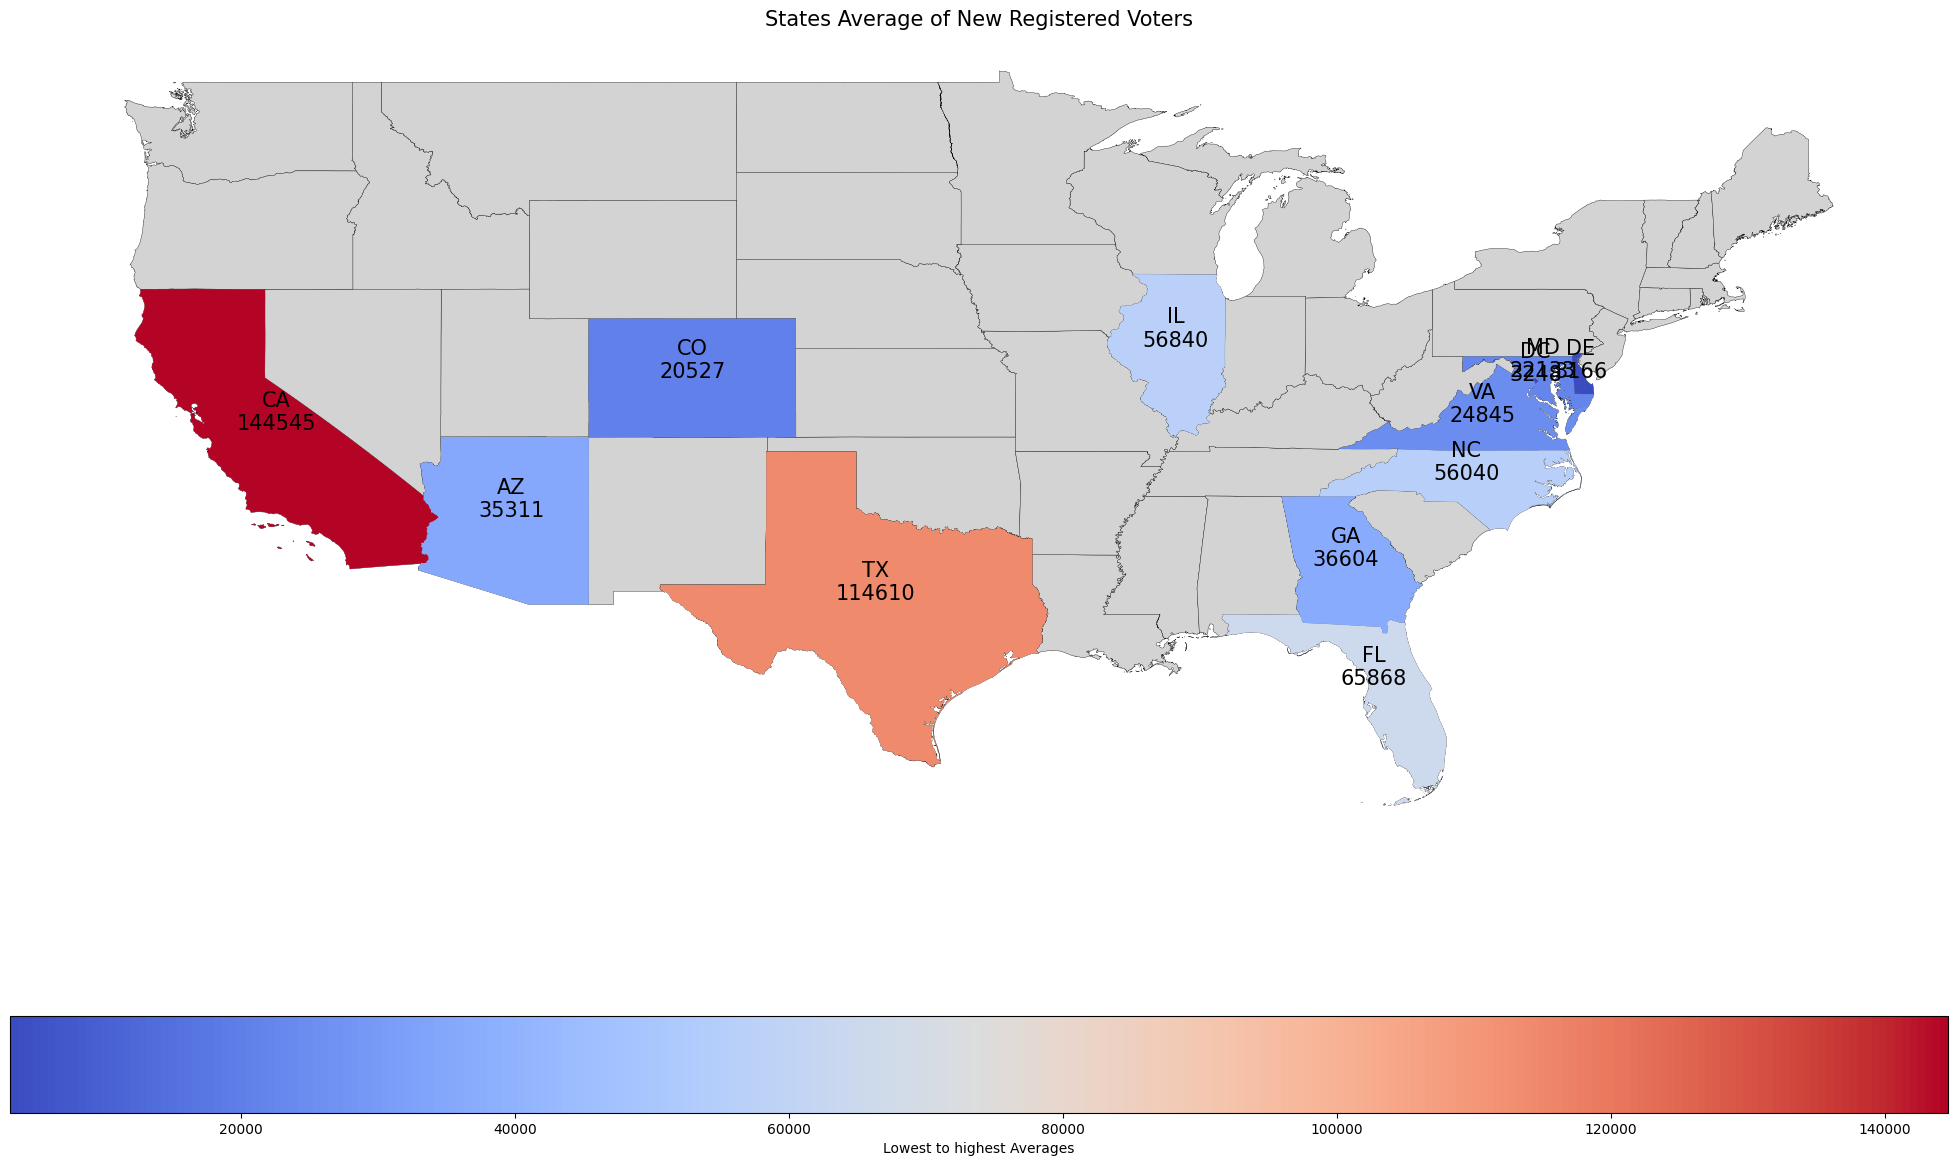

In [25]:
#plotting states that have resigtered voters information
fig=plt.figure(1,figsize=(25,15))
ax=fig.add_subplot()
bbox.plot(ax=ax,color='lightgray',linewidth=.25,edgecolor='black')
hasdata.plot(column='registered_voters',ax=ax,legend=True,cmap='coolwarm',linewidth=.25,
             legend_kwds={"label": "Lowest to highest Averages",
            "orientation": "horizontal"})
hasdata.apply(lambda x: ax.annotate(text=x.STUSPS +'\n'+str(int(x.registered_voters)) ,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=15),axis=1)
ax.set_axis_off()
plt.title("States Average of New Registered Voters",fontsize=15)
plt.show()

#Conclusion

##Insights:
Main take away is the new voter registration was not greatly affected by the pandemic. many state had a small decline but nothing major. Texas being one of the state with a significant decrease and california having the inverse effect. timing of registration seems to play a important role in the numbers. both 2016 and 2020 followed a similar trend which suggests external factors played a role in the decrease.
##Suggestions:
First suggestion would be to take a deeper dive into california to understand why how they were able to increase their new voters from 2016-2020. another suggestion would be to trying to find way to simplify registration procces. my guess is that the pandemic made it harder for people to register.
##Possible Next steps:
It would be helpful to gather data from more states to see if these trends hold true across the entire country. adding demogrpahic details like age, race, or income, could also help show who was being affected by the most. from there we could figure out more targeted solutions.

#GitHub

https://github.com/ADWCodes/325-Midterm.git

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [27]:
#Abraham Wiedenkeller